# Logistic Regression(complex)

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set. 
We'll be trying to predict a classification- survival or deceased.


## Import Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read the data
df=pd.read_csv("titanic_train.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#name,ticket is not useful.....let's drop them
df=df.drop(["Name","Ticket"],axis=1)

In [7]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


# Pre-processing

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.shape

(891, 10)

In [10]:
100*(df.isnull().sum())/891

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
#cabin contain 77% null values...let's drop it
df=df.drop("Cabin",axis=1)

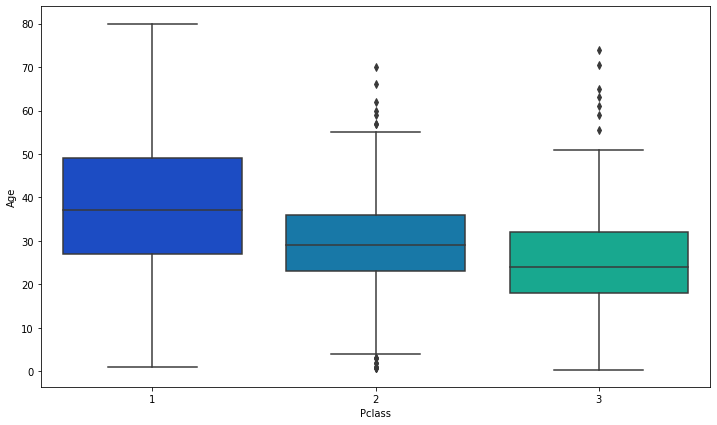

In [12]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [13]:
#We can see the wealthier passengers in the higher classes tend to be older,which makes sense. We'll use these average age values to impute based on Pclass for Age.
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [14]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
dtype: int64

In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## Converting Categorical Features 

In [18]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [19]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [20]:
df=df.drop(['Sex','Embarked'],axis=1)

In [21]:
df= pd.concat([df,sex,embark],axis=1)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression model



## Train Test Split

In [23]:
X=df.drop("Survived",axis=1)
y=df["Survived"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [26]:
X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [28]:
X_train[['Age','Fare']] = scaler.fit_transform(X_train[['Age','Fare']])

In [29]:
X_train

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
86,87,3,0.211742,1,3,0.067096,1,0,1
889,890,1,0.347649,0,0,0.058556,1,0,0
162,163,3,0.347649,0,0,0.015176,1,0,1
760,761,3,0.320468,0,0,0.028302,1,0,1
409,410,3,0.320468,3,1,0.049708,0,0,1
...,...,...,...,...,...,...,...,...,...
857,858,1,0.687415,0,0,0.051822,1,0,1
873,874,3,0.633052,0,0,0.017567,1,0,1
837,838,3,0.320468,0,0,0.015713,1,0,1
793,794,1,0.497146,0,0,0.059914,1,0,0


In [30]:
#using Stats model

In [31]:
import statsmodels.api as sm
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      612
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.81
Date:                Fri, 07 Aug 2020   Deviance:                       539.63
Time:                        19:54:01   Pearson chi2:                     685.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.8588      0.743      7.882      0.000       4.402       7.316
PassengerId     0.0001      0.000      0.344      0.731      -0.001       0.001
Pclass         -1.3043      0.183     -7.111      0.000      -1.664      -0.945
Age            -3.8199      0.740     -5.161      0.000      -5.271      -2.369
SibSp          -0.3089      0.129     -2.400      0.016      -0.561      -0.057
Parch          -0.0797      0.151     -0.529      0.597      -0.375       0.215
Fare            0.8795      1.519      0.579      0.563      -2.098       3.857
male           -2.7240      0.246    -11.062      0.000      -3.207      -2.241
Q              -0.5269      0.506     -1.041      0.298      -1.519       0.465
S              -0.2639      0.280     -0.943      0.346      -0.813       0.285
===============================================================================
"""

# RFE

In [32]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [33]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 5)            
rfe = rfe.fit(X_train, y_train)

In [34]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('PassengerId', False, 5),
 ('Pclass', True, 1),
 ('Age', True, 1),
 ('SibSp', False, 2),
 ('Parch', False, 4),
 ('Fare', True, 1),
 ('male', True, 1),
 ('Q', True, 1),
 ('S', False, 3)]

In [35]:
col = X_train.columns[rfe.support_]
col

Index(['Pclass', 'Age', 'Fare', 'male', 'Q'], dtype='object')

In [36]:
X_train.columns[~rfe.support_]

Index(['PassengerId', 'SibSp', 'Parch', 'S'], dtype='object')

In [37]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      616
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -275.14
Date:                Fri, 07 Aug 2020   Deviance:                       550.28
Time:                        19:54:02   Pearson chi2:                     700.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4706      0.670      8.162      0.000       4.157       6.784
Pclass        -1.3790      0.179     -7.723      0.000      -1.729      -1.029
Age           -3.3740      0.696     -4.847      0.000      -4.738      -2.010
Fare          -0.0536      1.304     -0.041      0.967      -2.610       2.503
male          -2.5916      0.231    -11.201      0.000      -3.045      -2.138
Q             -0.1384      0.435     -0.318      0.750      -0.991       0.714
==============================================================================
"""

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
vif = pd.DataFrame()
vif['Features'] =X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.44
1,Pclass,1.81
3,Fare,1.48
2,Age,1.27
4,male,1.07
5,Q,1.05


In [40]:
# lets drop fare column....

In [41]:
X_train_sm = sm.add_constant(X_train[col].drop("Fare",axis=1))
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      617
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -275.14
Date:                Fri, 07 Aug 2020   Deviance:                       550.28
Time:                        19:54:02   Pearson chi2:                     701.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4582      0.598      9.133      0.000       4.287       6.630
Pclass        -1.3757      0.159     -8.642      0.000      -1.688      -1.064
Age           -3.3714      0.693     -4.864      0.000      -4.730      -2.013
male          -2.5903      0.229    -11.290      0.000      -3.040      -2.141
Q             -0.1383      0.435     -0.318      0.750      -0.991       0.714
==============================================================================
"""

In [42]:
vif = pd.DataFrame()
vif['Features'] =X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.42
1,Pclass,1.33
2,Age,1.26
4,Q,1.05
3,male,1.04


In [43]:
# again drop Q column

In [44]:
X_train_sm = sm.add_constant(X_train[col].drop(["Fare","Q"],axis=1))
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      618
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -275.19
Date:                Fri, 07 Aug 2020   Deviance:                       550.38
Time:                        19:54:03   Pearson chi2:                     703.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4698      0.597      9.169      0.000       4.301       6.639
Pclass        -1.3860      0.156     -8.877      0.000      -1.692      -1.080
Age           -3.3803      0.692     -4.883      0.000      -4.737      -2.024
male          -2.5827      0.228    -11.332      0.000      -3.029      -2.136
==============================================================================
"""

In [45]:
vif = pd.DataFrame()
vif['Features'] =X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.27
1,Pclass,1.27
2,Age,1.25
3,male,1.03


In [46]:
X_train_sm=X_train[["Pclass","Age","male"]]

In [47]:
X_train_sm = sm.add_constant(X_train[col].drop(["Fare","Q"],axis=1))
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  622
Model:                            GLM   Df Residuals:                      618
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -275.19
Date:                Fri, 07 Aug 2020   Deviance:                       550.38
Time:                        19:54:03   Pearson chi2:                     703.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4698      0.597      9.169      0.000       4.301       6.639
Pclass        -1.3860      0.156     -8.877      0.000      -1.692      -1.080
Age           -3.3803      0.692     -4.883      0.000      -4.737      -2.024
male          -2.5827      0.228    -11.332      0.000      -3.029      -2.136
==============================================================================
"""

In [48]:
vif = pd.DataFrame()
vif['Features'] =X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.27
1,Pclass,1.27
2,Age,1.25
3,male,1.03


In [49]:
# logm4 is our final model....

In [50]:
X_train=X_train[["Pclass","Age","male"]]

In [51]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [52]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
ypred=model.predict(X_train)

## Residual Analysis of the train data

Text(0.5, 0, 'Errors')

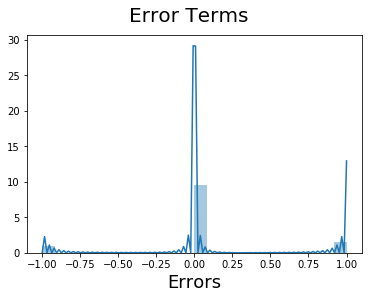

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - ypred))
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18) 

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(y_train,ypred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       389
           1       0.75      0.67      0.71       233

    accuracy                           0.79       622
   macro avg       0.78      0.77      0.78       622
weighted avg       0.79      0.79      0.79       622



In [57]:
print(confusion_matrix(y_train,ypred))

[[337  52]
 [ 76 157]]


## Making Predictions

In [58]:
X_test[['Age','Fare']] = scaler.transform(X_test[['Age','Fare']])

In [59]:
X_test_sm = X_test[X_train.columns]

In [60]:
X_test_sm

,Pclass,Age,male
639,3,0.320468,1
147,3,0.116608,0
278,3,0.089426,1
484,1,0.334058,1
770,3,0.320468,1
...,...,...,...
449,1,0.701006,1
106,3,0.279696,0
495,3,0.320468,1
414,3,0.592281,1


In [61]:
model.fit(X_test_sm,y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y1pred=model.predict(X_test_sm)

Text(0.5, 0, 'Errors')

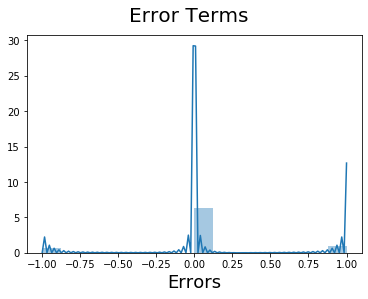

In [67]:
fig = plt.figure()
sns.distplot((y_test - y1pred))
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18) 

In [70]:
print(classification_report(y_test,y1pred))

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       160
           1       0.77      0.70      0.74       107

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



In [71]:
print(confusion_matrix(y_test,y1pred))

[[138  22]
 [ 32  75]]


## we get good results on both train and test sets....